In [56]:
from urllib.request import urlretrieve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve(URL, 'land_global_temperature_anomaly-1880-2016.csv')

('land_global_temperature_anomaly-1880-2016.csv',
 <http.client.HTTPMessage at 0x7da9e6d31c30>)

In [13]:
fname = './land_global_temperature_anomaly-1880-2016.csv'
year, temp_anomaly = np.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

In [ ]:
# prompt: # 1. x 연도, y temp_anomaly
# # 2. regression model을 만들어서 학습
# # 3. model에 x 를 대입해서 model.prediction(x) 를 이용해 예측 해보세요
# # 4. linear regression 1차식, non-linear regression 으로도 예측 해보세요 (3차 또는 5차식)
# # 일요일까지 결과만 캡쳐해서 보내주세요.

In [17]:
year.shape, temp_anomaly.shape

((174,), (174,))

In [19]:
# 1. x 연도, y temp_anomaly
X = year.reshape(-1, 1) # 2D배열
y = temp_anomaly

In [20]:
X.shape, y.shape

((174, 1), (174,))

In [49]:
# 2. regression model을 만들어서 학습
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)
score = model.score(X, y)

<function matplotlib.pyplot.show(close=None, block=None)>

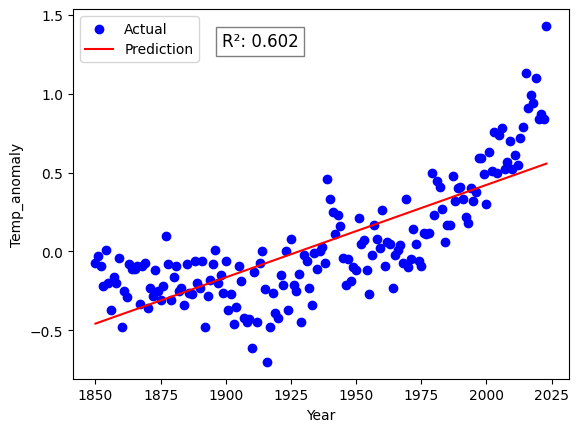

In [53]:
# 시각화(1차원)
from matplotlib import pyplot as plt
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, pred, color='red', label='Prediction')
plt.xlabel('Year')
plt.ylabel('Temp_anomaly')
plt.legend()
plt.text(0.3, 0.9, f'R²: {score:.3f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show

In [70]:
# 다항 회귀 (3차 다항식)
# https://m.blog.naver.com/samsjang/221006905415
poly_3 = PolynomialFeatures(degree=3)
X_poly = poly_3.fit_transform(X)
lr_model = LinearRegression()
lr_model.fit(X_poly, y)
pred = lr_model.predict(X_poly)
score = lr_model.score(X_poly, y)
score

0.8108055985137802

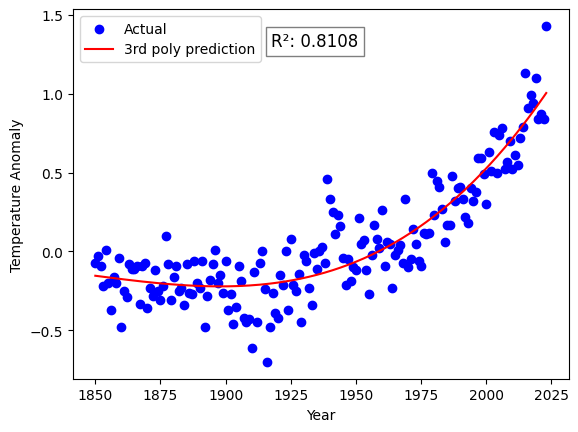

In [72]:
# 다항 회귀 결과 시각화 (3차)
plt.scatter(year, temp_anomaly, color='blue', label='Actual')
plt.plot(year, pred, color='red', label='3rd poly prediction')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.text(0.4, 0.9, f'R²: {score:.4f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()

In [73]:
# 다항 회귀 (5차 다항식)
poly_5 = PolynomialFeatures(degree=5)
X_poly = poly_5.fit_transform(X)
lr_model = LinearRegression()
lr_model.fit(X_poly, y)
pred = lr_model.predict(X_poly)
score = lr_model.score(X_poly, y)
score

0.811099066873432

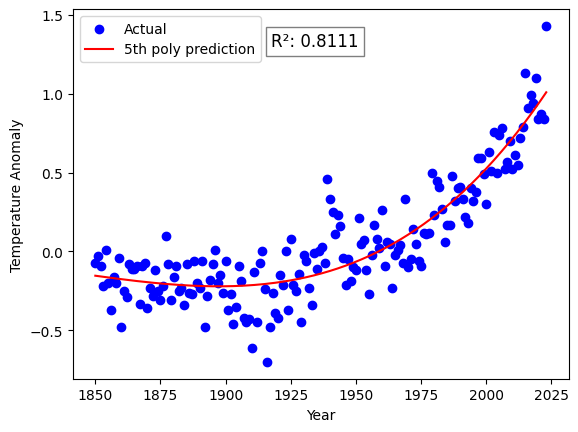

In [74]:
# 다항 회귀 결과 시각화 (5차)
plt.scatter(year, temp_anomaly, color='blue', label='Actual')
plt.plot(year, pred, color='red', label='5th poly prediction')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.text(0.4, 0.9, f'R²: {score:.4f}', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.show()